In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import warnings
warnings.filterwarnings("ignore")

# Problem 1:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [2]:
salarydata = pd.read_csv('SalaryData.csv')

In [134]:
salarydata

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

In [136]:
salarydata.head(10)

Education       Occupation  Salary
0   Doctorate     Adm-clerical  153197
1   Doctorate     Adm-clerical  115945
2   Doctorate     Adm-clerical  175935
3   Doctorate     Adm-clerical  220754
4   Doctorate            Sales  170769
5   Doctorate            Sales  219420
6   Doctorate            Sales  237920
7   Doctorate            Sales  160540
8   Doctorate            Sales  180934
9   Doctorate   Prof-specialty  248156

In [135]:
salarydata.shape

(40, 3)

In [6]:
salarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [7]:
salarydata.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

In [8]:
salarydata.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [9]:
salarydata.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [10]:
salarydata.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [11]:
salarydata.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [137]:
duplicate  = salarydata.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

salarydata[duplicate]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Education, Occupation, Salary]
Index: []

# 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [12]:
data_1 = 'Salary ~ C(Education)'
model = ols(data_1,salarydata).fit()
anova_table = anova_lm(model)
(anova_table)

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

# 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
data_1 = 'Salary ~ C(Occupation)'
model = ols(data_1,salarydata).fit()
anova_table_occ = anova_lm(model)
(anova_table_occ)

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

# 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [14]:
salarydata.groupby('Education')['Salary'].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

In [15]:
salarydata.groupby('Occupation')['Salary'].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

In [16]:
salarydata.Salary.mean()

162186.875

# 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

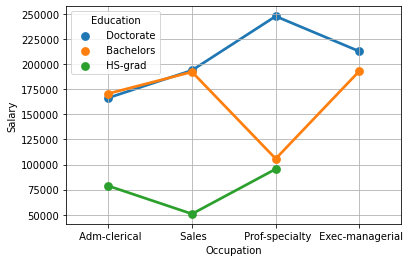

In [17]:
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education', data=salarydata ,ci=None)
plt.grid()
plt.show()

# 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [19]:
formula = 'Salary ~ C(Education)+C(Occupation) + C(Education):C(Occupation)'
model = ols(formula,salarydata).fit()
anova_table_eos = anova_lm(model)
(anova_table_eos)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

# Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [20]:
edu_post=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [148]:
edu_dic = pd.read_excel('Data Dictionary.xlsx')

In [150]:
edu_dic

1)      Names: Names of various university and colleges
0       2)      Apps: Number of applications received     
1     3)      Accept: Number of applications accepted     
2     4)      Enroll: Number of new students enrolled     
3   5)      Top10perc: Percentage of new students ...     
4   6)      Top25perc: Percentage of new students ...     
5   7)      F.Undergrad: Number of full-time under...     
6   8)      P.Undergrad: Number of part-time under...     
7   9)      Outstate: Number of students for whom ...     
8            10)   Room.Board: Cost of Room and board     
9     11)   Books: Estimated book costs for a student     
10  12)   Personal: Estimated personal spending fo...     
11    13)   PhD: Percentage of faculties with Ph.D.’s     
12  14)   Terminal: Percentage of faculties with t...     
13             15)   S.F.Ratio: Student/faculty ratio     
14  16)   perc.alumni: Percentage of alumni who do...     
15  17)   Expend: The Instructional expenditure pe...     
16                   18)   Grad.Rate: Graduation rate

In [151]:
edu_post.head(5)

Names    Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660.0  1232.0   721.0       23.0         52   
1            Adelphi University  2186.0  1924.0   512.0       16.0         29   
2                Adrian College  1428.0  1097.0   336.0       22.0         50   
3           Agnes Scott College   417.0   349.0   137.0       60.0         89   
4     Alaska Pacific University   193.0   146.0    55.0       16.0         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
0       2885.0        537.0    7440.0      3300.0  450.0    2200.0  70.0   
1       2683.0       1227.0   12280.0      6450.0  750.0    1500.0  29.0   
2       1036.0         99.0   11250.0      3750.0  400.0    1165.0  53.0   
3        510.0         63.0   12960.0      5450.0  450.0     875.0  92.0   
4        249.0        869.0    7560.0      4120.0  795.0    1500.0  76.0   

   Terminal  S.F.Ratio  perc.alumni   Expend  Grad.Rate  
0      78.0       18.1         12.0   7041.0       60.0  
1      39.5       12.2         16.0  10527.0       56.0  
2      66.0       12.9         30.0   8735.0       54.0  
3      97.0        7.7         37.0  16948.5       59.0  
4      72.0       11.9          2.0  10922.0       15.5

In [22]:
edu_post.tail(10)

Names   Apps  Accept  Enroll  Top10perc  \
767              Winthrop University   2320    1805     769         24   
768       Wisconsin Lutheran College    152     128      75         17   
769            Wittenberg University   1979    1739     575         42   
770                  Wofford College   1501     935     273         51   
771  Worcester Polytechnic Institute   2768    2314     682         49   
772          Worcester State College   2197    1515     543          4   
773                Xavier University   1959    1805     695         24   
774   Xavier University of Louisiana   2097    1915     695         34   
775                  Yale University  10705    2453    1317         95   
776     York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
767         61         3395          670      6400        3392    580   
768         41          282           22      9100        3700    500   
769         68         1980          144     15948        4404    400   
770         83         1059           34     12680        4150    605   
771         86         2802           86     15884        5370    530   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
767      2150   71        80       12.8           26    6729         59  
768      1400   48        48        8.5           26    8960         50  
769       800   82        95       12.8           29   10414         78  
770      1440   91        92       15.3           42    7875         75  
771       730   92        94       15.2           34   10774         82  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [23]:
edu_post.shape

(777, 18)

In [24]:
edu_post.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [25]:
edu_post.describe(include='all')

Names          Apps        Accept       Enroll   Top10perc  \
count                777    777.000000    777.000000   777.000000  777.000000   
unique               777           NaN           NaN          NaN         NaN   
top     Meredith College           NaN           NaN          NaN         NaN   
freq                   1           NaN           NaN          NaN         NaN   
mean                 NaN   3001.638353   2018.804376   779.972973   27.558559   
std                  NaN   3870.201484   2451.113971   929.176190   17.640364   
min                  NaN     81.000000     72.000000    35.000000    1.000000   
25%                  NaN    776.000000    604.000000   242.000000   15.000000   
50%                  NaN   1558.000000   1110.000000   434.000000   23.000000   
75%                  NaN   3624.000000   2424.000000   902.000000   35.000000   
max                  NaN  48094.000000  26330.000000  6392.000000   96.000000   

         Top25perc   F.Undergrad   P.Undergrad      Outstate   Room.Board  \
count   777.000000    777.000000    777.000000    777.000000   777.000000   
unique         NaN           NaN           NaN           NaN          NaN   
top            NaN           NaN           NaN           NaN          NaN   
freq           NaN           NaN           NaN           NaN          NaN   
mean     55.796654   3699.907336    855.298584  10440.669241  4357.526384   
std      19.804778   4850.420531   1522.431887   4023.016484  1096.696416   
min       9.000000    139.000000      1.000000   2340.000000  1780.000000   
25%      41.000000    992.000000     95.000000   7320.000000  3597.000000   
50%      54.000000   1707.000000    353.000000   9990.000000  4200.000000   
75%      69.000000   4005.000000    967.000000  12925.000000  5050.000000   
max     100.000000  31643.000000  21836.000000  21700.000000  8124.000000   

              Books     Personal         PhD    Terminal   S.F.Ratio  \
count    777.000000   777.000000  777.000000  777.000000  777.000000   
unique          NaN          NaN         NaN         NaN         NaN   
top             NaN          NaN         NaN         NaN         NaN   
freq            NaN          NaN         NaN         NaN         NaN   
mean     549.380952  1340.642214   72.660232   79.702703   14.089704   
std      165.105360   677.071454   16.328155   14.722359    3.958349   
min       96.000000   250.000000    8.000000   24.000000    2.500000   
25%      470.000000   850.000000   62.000000   71.000000   11.500000   
50%      500.000000  1200.000000   75.000000   82.000000   13.600000   
75%      600.000000  1700.000000   85.000000   92.000000   16.500000   
max     2340.000000  6800.000000  103.000000  100.000000   39.800000   

        perc.alumni        Expend  Grad.Rate  
count    777.000000    777.000000  777.00000  
unique          NaN           NaN        NaN  
top             NaN           NaN        NaN  
freq            NaN           NaN        NaN  
mean      22.743887   9660.171171   65.46332  
std       12.391801   5221.768440   17.17771  
min        0.000000   3186.000000   10.00000  
25%       13.000000   6751.000000   53.00000  
50%       21.000000   8377.000000   65.00000  
75%       31.000000  10830.000000   78.00000  
max       64.000000  56233.000000  118.00000

In [26]:
edu_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [27]:
edu_post.duplicated().sum()

0

In [152]:
duplicate  = edu_post.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

salarydata[duplicate]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Education, Occupation, Salary]
Index: []

In [154]:
edu_post.skew()

Apps           1.166334
Accept         1.151199
Enroll         1.155018
Top10perc      0.880389
Top25perc      0.259340
F.Undergrad    1.149049
P.Undergrad    1.166203
Outstate       0.507441
Room.Board     0.442530
Books          0.239716
Personal       0.792012
PhD           -0.606822
Terminal      -0.710578
S.F.Ratio      0.266828
perc.alumni    0.572760
Expend         0.875535
Grad.Rate     -0.106733
dtype: float64

# 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

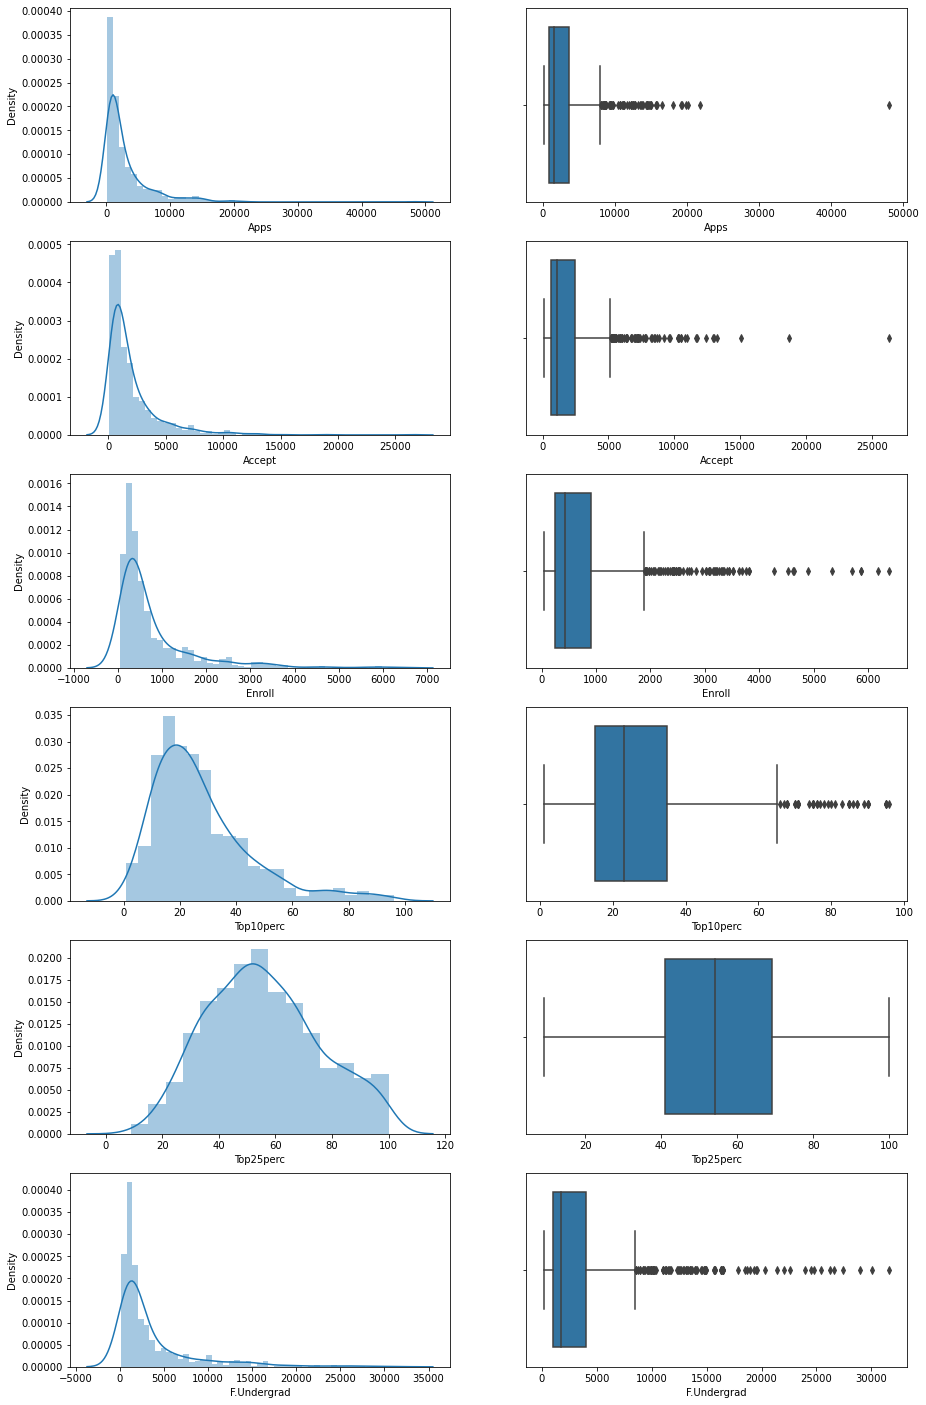

In [29]:
fig,location = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15,25);

sns.distplot(edu_post['Apps'],ax=location[0][0])
sns.boxplot(edu_post['Apps'],orient='H',ax=location[0][1])

sns.distplot(edu_post['Accept'],ax=location[1][0])
sns.boxplot(edu_post['Accept'],orient='H',ax=location[1][1])

sns.distplot(edu_post['Enroll'],ax=location[2][0])
sns.boxplot(edu_post['Enroll'],orient='H',ax=location[2][1])

sns.distplot(edu_post['Top10perc'],ax=location[3][0])
sns.boxplot(edu_post['Top10perc'],orient='H',ax=location[3][1])

sns.distplot(edu_post['Top25perc'],ax=location[4][0])
sns.boxplot(edu_post['Top25perc'],orient='H',ax=location[4][1])

sns.distplot(edu_post['F.Undergrad'],ax=location[5][0])
sns.boxplot(edu_post['F.Undergrad'],orient='H',ax=location[5][1]);

In [30]:
#plt.figure(figsize= (10,10))
#sns.boxplot(data = education_post,orient='h');

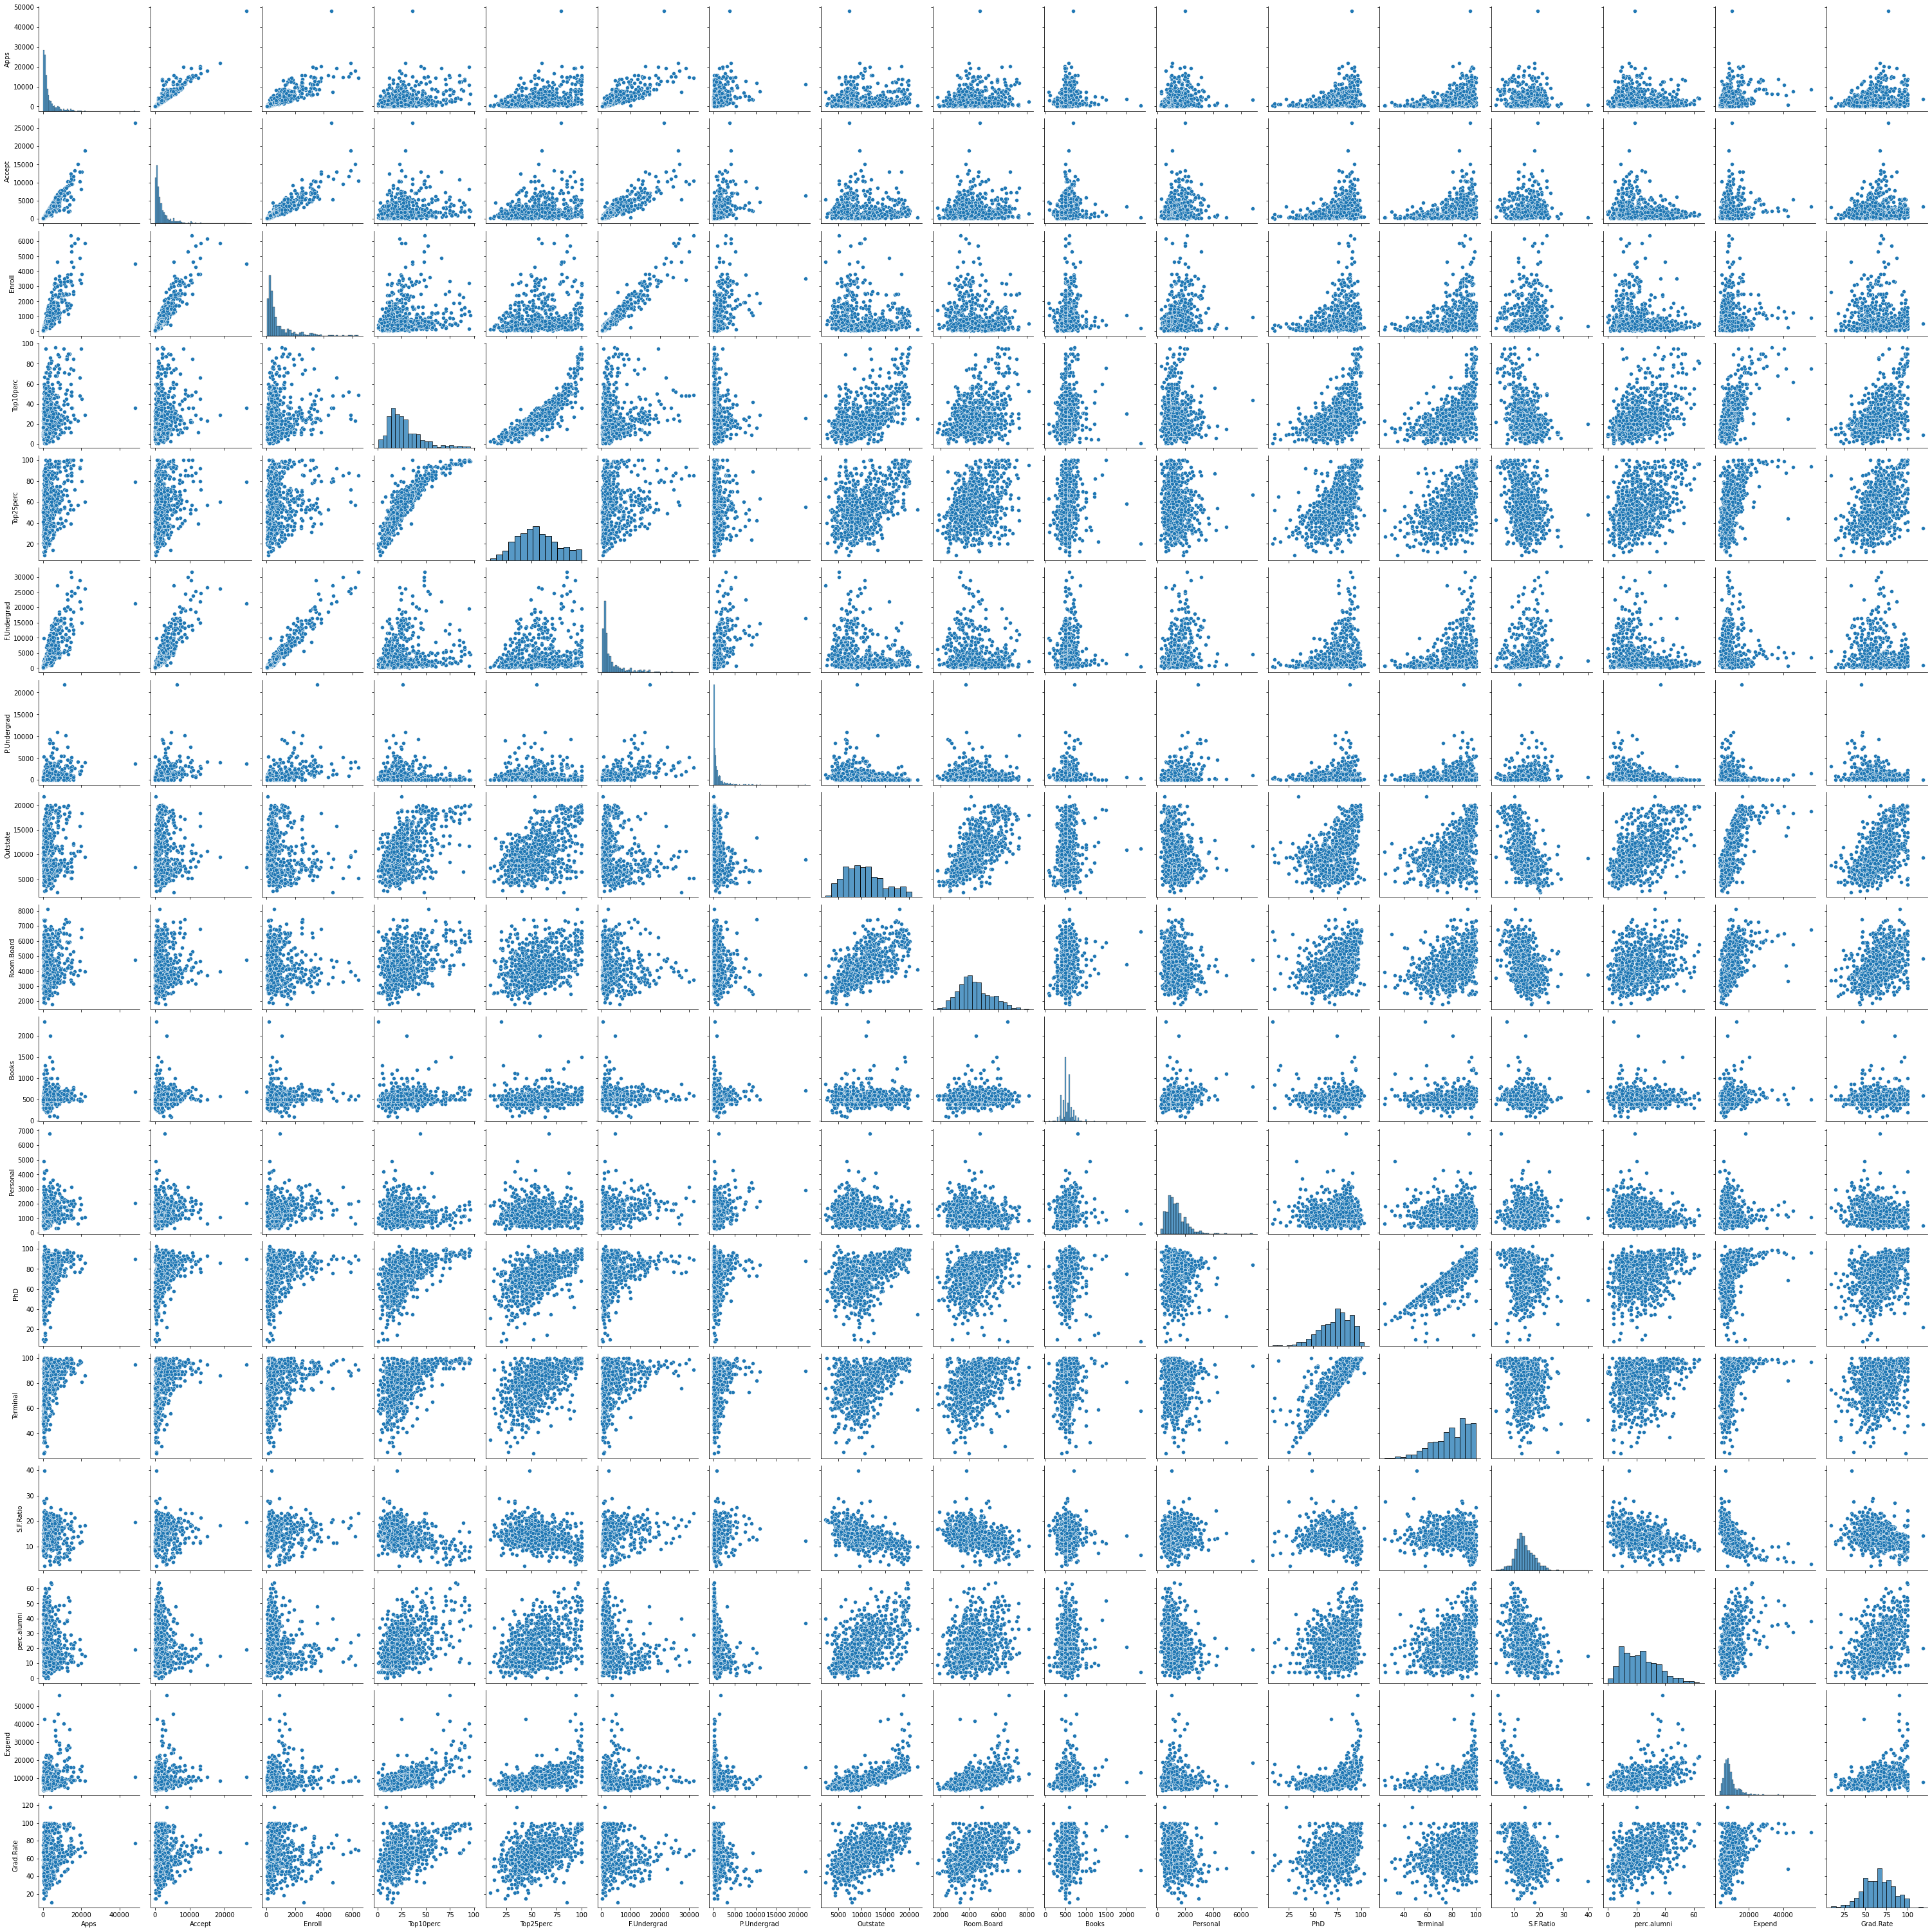

In [31]:
sns.pairplot(data=edu_post)
plt.show()

In [32]:
edu_post.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

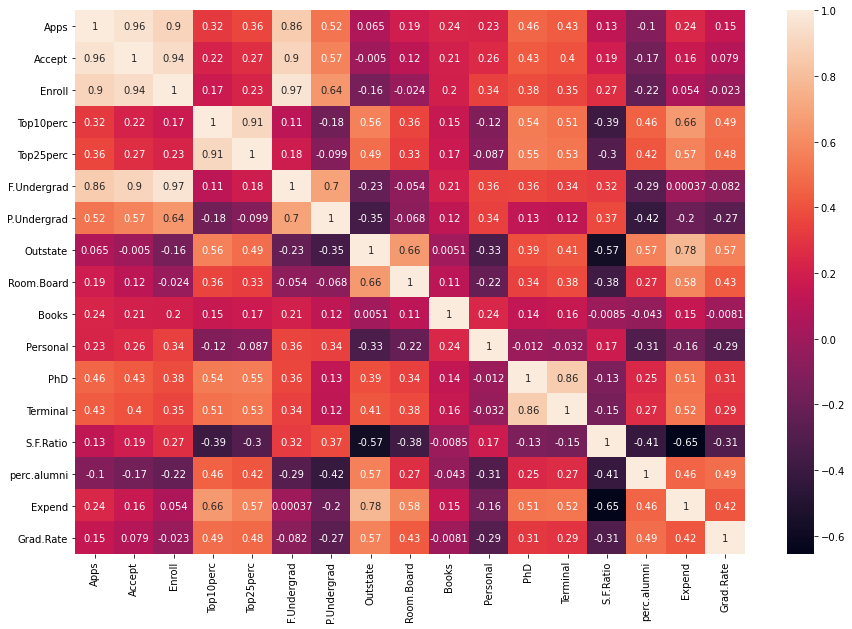

In [165]:
plt.subplots(figsize=(15,10))
sns.heatmap(edu_post.corr(),annot=True)

# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range 

In [35]:
lrapps,urapps=remove_outlier(edu_post['Apps'])
edu_post['Apps']=np.where(edu_post['Apps']>urapps,urapps,edu_post['Apps'])
edu_post['Apps']=np.where(edu_post['Apps']<lrapps,lrapps,edu_post['Apps'])

lraccept,uraccept=remove_outlier(edu_post['Accept'])
edu_post['Accept']=np.where(edu_post['Accept']>uraccept,uraccept,edu_post['Accept'])
edu_post['Accept']=np.where(edu_post['Accept']<lraccept,lraccept,edu_post['Accept'])

lrenroll,urenroll=remove_outlier(edu_post['Enroll'])
edu_post['Enroll']=np.where(edu_post['Enroll']>urenroll,urenroll,edu_post['Enroll'])
edu_post['Enroll']=np.where(edu_post['Enroll']<lrenroll,lrenroll,edu_post['Enroll'])

lrtop10,urtop10=remove_outlier(edu_post['Top10perc'])
edu_post['Top10perc']=np.where(edu_post['Top10perc']>urtop10,urtop10,edu_post['Top10perc'])
edu_post['Top10perc']=np.where(edu_post['Top10perc']<lrtop10,lrtop10,edu_post['Top10perc'])

lrfund,urfund=remove_outlier(edu_post['F.Undergrad'])
edu_post['F.Undergrad']=np.where(edu_post['F.Undergrad']>urfund,urfund,edu_post['F.Undergrad'])
edu_post['F.Undergrad']=np.where(edu_post['F.Undergrad']<lrfund,lrfund,edu_post['F.Undergrad'])

lrpund,urpund=remove_outlier(edu_post['P.Undergrad'])
edu_post['P.Undergrad']=np.where(edu_post['P.Undergrad']>urpund,urpund,edu_post['P.Undergrad'])
edu_post['P.Undergrad']=np.where(edu_post['P.Undergrad']<lrpund,lrpund,edu_post['P.Undergrad'])

lrout,urout=remove_outlier(edu_post['Outstate'])
edu_post['Outstate']=np.where(edu_post['Outstate']>urout,urout,edu_post['Outstate'])
edu_post['Outstate']=np.where(edu_post['Outstate']<lrout,lrout,edu_post['Outstate'])

lrroom,urroom=remove_outlier(edu_post['Room.Board'])
edu_post['Room.Board']=np.where(edu_post['Room.Board']>urroom,urroom,edu_post['Room.Board'])
edu_post['Room.Board']=np.where(edu_post['Room.Board']<lrroom,lrroom,edu_post['Room.Board'])

lrbooks,urbooks=remove_outlier(edu_post['Books'])
edu_post['Books']=np.where(edu_post['Books']>urbooks,urbooks,edu_post['Books'])
edu_post['Books']=np.where(edu_post['Books']<lrbooks,lrbooks,edu_post['Books'])

lrpersonal,urpersonal=remove_outlier(edu_post['Personal'])
edu_post['Personal']=np.where(edu_post['Personal']>urpersonal,urpersonal,edu_post['Personal'])
edu_post['Personal']=np.where(edu_post['Personal']<lrpersonal,lrpersonal,edu_post['Personal'])

lrPhD,urPhD=remove_outlier(edu_post['PhD'])
edu_post['PhD']=np.where(edu_post['PhD']>urPhD,urPhD,edu_post['PhD'])
edu_post['PhD']=np.where(edu_post['PhD']<lrPhD,lrPhD,edu_post['PhD'])

lrTerminal,urTerminal=remove_outlier(edu_post['Terminal'])
edu_post['Terminal']=np.where(edu_post['Terminal']>urTerminal,urTerminal,edu_post['Terminal'])
edu_post['Terminal']=np.where(edu_post['Terminal']<lrTerminal,lrTerminal,edu_post['Terminal'])

lrRatio,urRatio=remove_outlier(edu_post['S.F.Ratio'])
edu_post['S.F.Ratio']=np.where(edu_post['S.F.Ratio']>urRatio,urRatio,edu_post['S.F.Ratio'])
edu_post['S.F.Ratio']=np.where(edu_post['S.F.Ratio']<lrRatio,lrRatio,edu_post['S.F.Ratio'])

lralumni,uralumni=remove_outlier(edu_post['perc.alumni'])
edu_post['perc.alumni']=np.where(edu_post['perc.alumni']>uralumni,uralumni,edu_post['perc.alumni'])
edu_post['perc.alumni']=np.where(edu_post['perc.alumni']<lralumni,lralumni,edu_post['perc.alumni'])

lrExpend,urExpend=remove_outlier(edu_post['Expend'])
edu_post['Expend']=np.where(edu_post['Expend']>urExpend,urExpend,edu_post['Expend'])
edu_post['Expend']=np.where(edu_post['Expend']<lrExpend,lrExpend,edu_post['Expend'])

lrGRate,urGRate=remove_outlier(edu_post['Grad.Rate'])
edu_post['Grad.Rate']=np.where(edu_post['Grad.Rate']>urGRate,urGRate,edu_post['Grad.Rate'])
edu_post['Grad.Rate']=np.where(edu_post['Grad.Rate']<lrGRate,lrGRate,edu_post['Grad.Rate'])


edu_post.shape

(777, 18)

<AxesSubplot:>

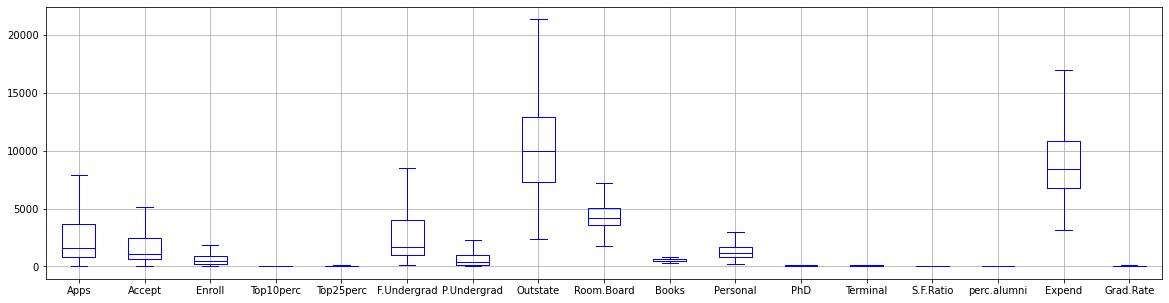

In [36]:
edu_post.boxplot(figsize=(20,5),color='blue')

In [37]:
df2=edu_post.drop(['Names'],axis=1)
df2.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0         52       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0         29       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0         50       1036.0         99.0   
3   417.0   349.0   137.0       60.0         89        510.0         63.0   
4   193.0   146.0    55.0       16.0         44        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      39.5       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   
3   12960.0      5450.0  450.0     875.0  92.0      97.0        7.7   
4    7560.0      4120.0  795.0    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  16948.5       59.0  
4          2.0  10922.0       15.5

In [38]:
from scipy.stats import zscore
df3=df2.apply(zscore)
df3.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

In [39]:
df3.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   1.234534e-16  1.340626e-16  1.521645e-16 -2.250452e-18 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.028801e+00 -1.099832e+00 -1.097636e+00 -1.659526e+00 -2.364419e+00   
25%   -7.416863e-01 -7.503620e-01 -7.343246e-01 -7.605060e-01 -7.476067e-01   
50%   -4.186307e-01 -4.179715e-01 -3.973405e-01 -2.467801e-01 -9.077663e-02   
75%    4.348639e-01  4.451926e-01  4.240582e-01  5.238086e-01  6.671042e-01   
max    2.199689e+00  2.238524e+00  2.161632e+00  2.450281e+00  2.233391e+00   

        F.Undergrad   P.Undergrad      Outstate    Room.Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.911679e-16 -9.573352e-17 -1.583175e-16 -1.900382e-17 -4.465183e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.036373e+00 -9.148817e-01 -2.015414e+00 -2.362866e+00 -2.296251e+00   
25%   -7.202711e-01 -7.835625e-01 -7.763375e-01 -6.958379e-01 -6.028889e-01   
50%   -4.553086e-01 -4.231331e-01 -1.120135e-01 -1.426086e-01 -3.423717e-01   
75%    3.962772e-01  4.346329e-01  6.182452e-01  6.372337e-01  5.260190e-01   
max    2.071100e+00  2.261926e+00  2.710119e+00  2.636841e+00  2.219381e+00   

           Personal           PhD      Terminal     S.F.Ratio   perc.alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -9.605501e-17  4.232636e-16  2.460494e-16  3.635016e-16  5.765444e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.762874e+00 -2.839817e+00 -2.785068e+00 -2.657805e+00 -1.844686e+00   
25%   -7.778356e-01 -6.758374e-01 -6.072078e-01 -6.746097e-01 -7.892812e-01   
50%   -2.032301e-01  1.395751e-01  1.533146e-01 -1.193150e-01 -1.398012e-01   
75%    6.176349e-01  7.668155e-01  8.446987e-01  6.475205e-01  6.720488e-01   
max    2.710841e+00  1.895848e+00  1.397806e+00  2.630716e+00  2.864044e+00   

             Expend     Grad.Rate  
count  7.770000e+02  7.770000e+02  
mean   1.148802e-16 -2.743408e-16  
std    1.000644e+00  1.000644e+00  
min   -1.766640e+00 -2.916759e+00  
25%   -7.163529e-01 -7.278094e-01  
50%   -2.373159e-01 -2.734544e-02  
75%    4.853641e-01  7.314905e-01  
max    2.287940e+00  2.920440e+00

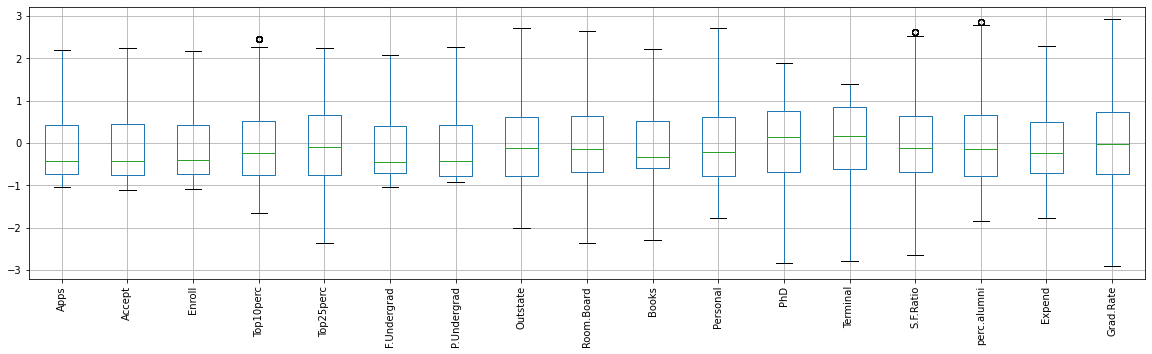

In [167]:
df3.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]


In [45]:
edu_cov = pd.DataFrame.cov(df3)
edu_cov

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.956538  0.898039   0.321756   0.364961     0.862111   
Accept       0.956538  1.001289  0.936482   0.223586   0.274033     0.898190   
Enroll       0.898039  0.936482  1.001289   0.171977   0.230731     0.968549   
Top10perc    0.321756  0.223586  0.171977   1.001289   0.915053     0.111358   
Top25perc    0.364961  0.274033  0.230731   0.915053   1.001289     0.181429   
F.Undergrad  0.862111  0.898190  0.968549   0.111358   0.181429     1.001289   
P.Undergrad  0.520493  0.573429  0.642422  -0.180241  -0.099423     0.697027   
Outstate     0.065421 -0.005009 -0.155856   0.562884   0.490200    -0.226457   
Room.Board   0.187717  0.119740 -0.023876   0.357826   0.331413    -0.054546   
Books        0.236442  0.208974  0.202317   0.153650   0.169980     0.208147   
Personal     0.230244  0.256676  0.339785  -0.116880  -0.086922     0.360246   
PhD          0.464522  0.427891  0.382031   0.544749   0.552172     0.362030   
Terminal     0.435038  0.403929  0.354836   0.507401   0.528334     0.335486   
S.F.Ratio    0.126574  0.188749  0.274622  -0.388426  -0.297616     0.324922   
perc.alumni -0.101288 -0.165729 -0.223010   0.456384   0.417369    -0.285825   
Expend       0.243248  0.162017  0.054291   0.657886   0.573643     0.000371   
Grad.Rate    0.150998  0.079084 -0.023281   0.494307   0.479602    -0.082345   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.520493  0.065421    0.187717  0.236442  0.230244  0.464522   
Accept          0.573429 -0.005009    0.119740  0.208974  0.256676  0.427891   
Enroll          0.642422 -0.155856   -0.023876  0.202317  0.339785  0.382031   
Top10perc      -0.180241  0.562884    0.357826  0.153650 -0.116880  0.544749   
Top25perc      -0.099423  0.490200    0.331413  0.169980 -0.086922  0.552172   
F.Undergrad     0.697027 -0.226457   -0.054546  0.208147  0.360246  0.362030   
P.Undergrad     1.001289 -0.354673   -0.067725  0.122686  0.344496  0.127827   
Outstate       -0.354673  1.001289    0.656334  0.005117 -0.326029  0.391825   
Room.Board     -0.067725  0.656334    1.001289  0.109065 -0.219837  0.341909   
Books           0.122686  0.005117    0.109065  1.001289  0.240172  0.136566   
Personal        0.344496 -0.326029   -0.219837  0.240172  1.001289 -0.011699   
PhD             0.127827  0.391825    0.341909  0.136566 -0.011699  1.001289   
Terminal        0.122309  0.413110    0.379759  0.159523 -0.032012  0.864040   
S.F.Ratio       0.371085 -0.574422   -0.376915 -0.008547  0.174137 -0.129556   
perc.alumni    -0.419874  0.566465    0.272744 -0.042887 -0.306147  0.249198   
Expend         -0.202189  0.776327    0.581370  0.150177 -0.163481  0.511187   
Grad.Rate      -0.265499  0.573196    0.426339 -0.008061 -0.291269  0.310419   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.435038   0.126574    -0.101288  0.243248   0.150998  
Accept       0.403929   0.188749    -0.165729  0.162017   0.079084  
Enroll       0.354836   0.274622    -0.223010  0.054291  -0.023281  
Top10perc    0.507401  -0.388426     0.456384  0.657886   0.494307  
Top25perc    0.528334  -0.297616     0.417369  0.573643   0.479602  
F.Undergrad  0.335486   0.324922    -0.285825  0.000371  -0.082345  
P.Undergrad  0.122309   0.371085    -0.419874 -0.202189  -0.265499  
Outstate     0.413110  -0.574422     0.566465  0.776327   0.573196  
Room.Board   0.379759  -0.376915     0.272744  0.581370   0.426339  
Books        0.159523  -0.008547    -0.042887  0.150177  -0.008061  
Personal    -0.032012   0.174137    -0.306147 -0.163481  -0.291269  
PhD          0.864040  -0.129556     0.249198  0.511187   0.310419  
Terminal     1.001289  -0.151188     0.266375  0.524744   0.293180  
S.F.Ratio   -0.151188   1.001289    -0.412632 -0.655220  -0.308922  
perc.alumni  0.266375  -0.412632     1.001289  0.463519   0.492041  
Expend       0.524744  -0.65522

In [83]:
cov_matrix= np.cov(df3.T)
cov_matrix

array([[ 1.00128866e+00,  9.56537704e-01,  8.98039052e-01,
         3.21756324e-01,  3.64960691e-01,  8.62111140e-01,
         5.20492952e-01,  6.54209711e-02,  1.87717056e-01,
         2.36441941e-01,  2.30243993e-01,  4.64521757e-01,
         4.35037784e-01,  1.26573895e-01, -1.01288006e-01,
         2.43248206e-01,  1.50997775e-01],
       [ 9.56537704e-01,  1.00128866e+00,  9.36482483e-01,
         2.23586208e-01,  2.74033187e-01,  8.98189799e-01,
         5.73428908e-01, -5.00874847e-03,  1.19740419e-01,
         2.08974091e-01,  2.56676290e-01,  4.27891234e-01,
         4.03929238e-01,  1.88748711e-01, -1.65728801e-01,
         1.62016688e-01,  7.90839722e-02],
       [ 8.98039052e-01,  9.36482483e-01,  1.00128866e+00,
         1.71977357e-01,  2.30730728e-01,  9.68548601e-01,
         6.42421828e-01, -1.55856056e-01, -2.38762560e-02,
         2.02317274e-01,  3.39785395e-01,  3.82031198e-01,
         3.54835877e-01,  2.74622251e-01, -2.23009677e-01,
         5.42906862e-02, -2.3

In [47]:
df3.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

In [57]:
print('Data before scaling')
df2.head()

Data before scaling


Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0         52       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0         29       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0         50       1036.0         99.0   
3   417.0   349.0   137.0       60.0         89        510.0         63.0   
4   193.0   146.0    55.0       16.0         44        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      39.5       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   
3   12960.0      5450.0  450.0     875.0  92.0      97.0        7.7   
4    7560.0      4120.0  795.0    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  16948.5       59.0  
4          2.0  10922.0       15.5

In [54]:
print('Data after scaling')
df3.head()

Data after scaling


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

<AxesSubplot:>

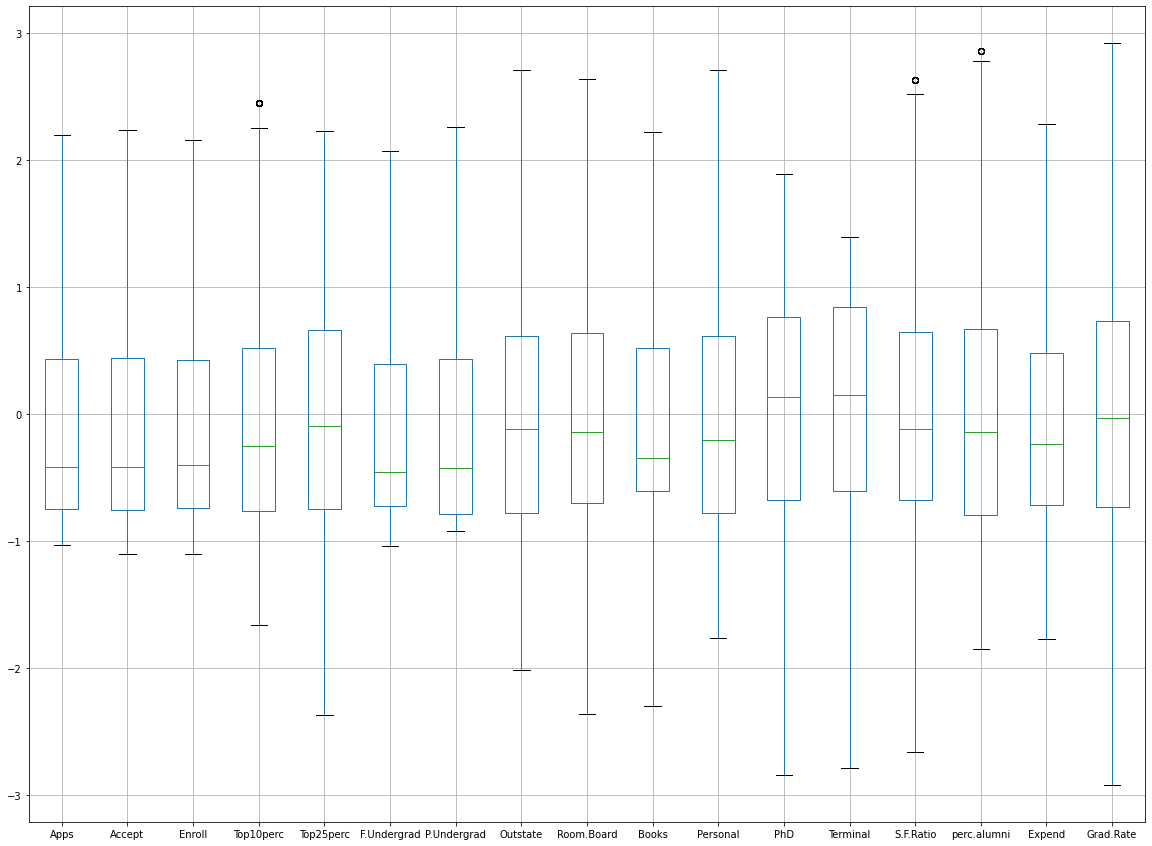

In [50]:
df3.boxplot(figsize=(20,15))

# 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [85]:
eigen_values , eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Value \n\n', eigen_values)
print('\n')
print('Eigen Vector \n\n', eigen_vectors)

Eigen Value 

 [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vector 

 [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272

# 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [ ]:
#Two Test to be conducted before PCA

In [66]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df3)
print('P_value =',p_value)

P_value = 0.0


In [65]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(df3)
print('Measure of sampling adequacy(MSA) =',kmo_model)

Measure of sampling adequacy(MSA) = 0.84946246682314


In [67]:
#Both test passed,Next step to perform pca

In [86]:
#covariance_matrix = np.cov(df3.T)
#print('Covariance_matrix \n\n',covariance_matrix)

In [87]:
print('Covariance_matrix \n\n',cov_matrix)

Covariance_matrix 

 [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-0

In [88]:
eigen_values , eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Value \n\n', eigen_values)
print('\n')
print('Eigen Vector \n\n', eigen_vectors)

Eigen Value 

 [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vector 

 [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272

# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [107]:
total = sum(eigen_values)
var_exp = [( i/total ) * 100 for i in sorted(eigen_values, reverse=True)]
cumulative_var = np.cumsum(var_exp)
print('Cumulative variance Explained \n\n',np.round(cumulative_var,2))

Cumulative variance Explained 

 [ 33.27  62.02  68.64  74.54  79.66  84.16  87.6   90.79  93.28  95.52
  96.97  97.84  98.63  99.21  99.65  99.87 100.  ]


# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

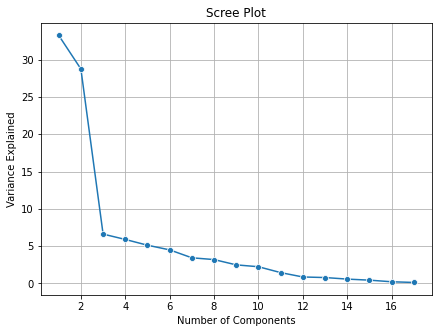

In [102]:
plt.figure(figsize=(7,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show()

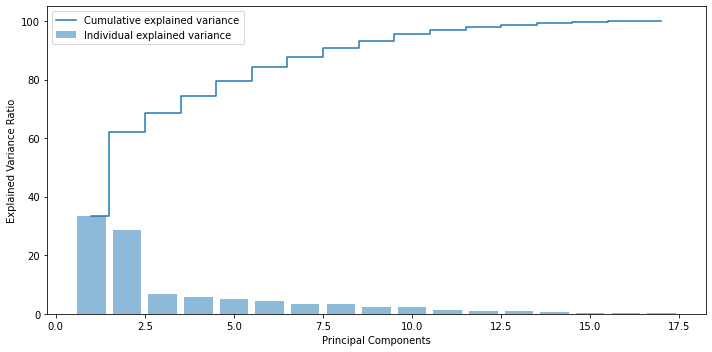

In [104]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_values.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1),cumulative_var , where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [130]:
print("Dimension Reduction")
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df3)
df_pca.transpose()

Dimension Reduction


array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004476,  2.12212752, -0.50151255, ...,  0.32216034,
         1.32596561, -1.42543835],
       ...,
       [-0.36688624,  2.4532119 ,  0.76599685, ...,  0.17522459,
         1.36851658,  0.7209176 ],
       [-0.69747582,  0.99485851, -1.02623665, ...,  0.50404279,
        -0.8227456 ,  1.0518097 ],
       [ 0.71061626, -0.39608317, -0.16531057, ..., -1.45835209,
         1.20132639,  1.07308672]])